## Tools for manipulating bed files

A list of tools is often maintained here : https://genome.ucsc.edu/util.html

Interesting ones include:
- BEDOPS
- BEDTools
- bwTools
- wiggleTools
- crossMap

- Human Reference Genome Annotation: https://www.gencodegenes.org/human/


# Methylation and mutation - Xena data

In [1]:
import pandas as pd
import gzip
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [42]:
# Open the .gz file and read the TSV file
gz_file_path = 'TCGA-LGG.mutect2_snv.tsv.gz'

with gzip.open(gz_file_path, 'rt') as f:
    df = pd.read_csv(f, sep='\t', header=0)

df.head()

,Sample_ID,gene,chrom,start,end,ref,alt,Amino_Acid_Change,effect,filter,dna_vaf
0,TCGA-VM-A8CB-01A,FUBP1,chr1,77960221,77960222,TG,-,p.A513Vfs*11,frameshift_variant,PASS,0.724138
1,TCGA-VM-A8CB-01A,CXCR4,chr2,136115840,136115840,G,A,p.R30C,missense_variant,panel_of_normals,0.572816
2,TCGA-VM-A8CB-01A,ITGA4,chr2,181482581,181482581,T,C,p.L324P,missense_variant,PASS,0.053812
3,TCGA-VM-A8CB-01A,IDH1,chr2,208248388,208248388,C,T,p.R132H,missense_variant,PASS,0.366337
4,TCGA-VM-A8CB-01A,MLPH,chr2,237511075,237511075,C,T,p.S140F,missense_variant,PASS,0.125984


In [43]:
# Create a new column for the concatenated chr:start-end
df['Location'] = df['chrom'].astype(str) + ':' + df['start'].astype(str) + '-' + df['end'].astype(str)

df.head()

,Sample_ID,gene,chrom,start,end,ref,alt,Amino_Acid_Change,effect,filter,dna_vaf,Location
0,TCGA-VM-A8CB-01A,FUBP1,chr1,77960221,77960222,TG,-,p.A513Vfs*11,frameshift_variant,PASS,0.724138,chr1:77960221-77960222
1,TCGA-VM-A8CB-01A,CXCR4,chr2,136115840,136115840,G,A,p.R30C,missense_variant,panel_of_normals,0.572816,chr2:136115840-136115840
2,TCGA-VM-A8CB-01A,ITGA4,chr2,181482581,181482581,T,C,p.L324P,missense_variant,PASS,0.053812,chr2:181482581-181482581
3,TCGA-VM-A8CB-01A,IDH1,chr2,208248388,208248388,C,T,p.R132H,missense_variant,PASS,0.366337,chr2:208248388-208248388
4,TCGA-VM-A8CB-01A,MLPH,chr2,237511075,237511075,C,T,p.S140F,missense_variant,PASS,0.125984,chr2:237511075-237511075


In [29]:
df.shape

(32784, 13)

In [5]:
# Get unique sample IDs
unique_sample_ids = df['Sample_ID'].unique()

len(unique_sample_ids)

508

In [6]:
#filter out the columns of interest
df_filter = df[['Sample_ID', 'Location']]

df_filter.head()

,Sample_ID,Location
0,TCGA-VM-A8CB-01A,chr1:77960221-77960222
1,TCGA-VM-A8CB-01A,chr2:136115840-136115840
2,TCGA-VM-A8CB-01A,chr2:181482581-181482581
3,TCGA-VM-A8CB-01A,chr2:208248388-208248388
4,TCGA-VM-A8CB-01A,chr2:237511075-237511075


In [7]:
new_df = pd.crosstab(index=df_filter['Location'], columns=df_filter['Sample_ID'])

In [8]:
new_df.shape

(34786, 508)

In [9]:
new_df.head()

Sample_ID,TCGA-CS-4938-01B,TCGA-CS-4941-01A,TCGA-CS-4942-01A,TCGA-CS-4943-01A,TCGA-CS-4944-01A,TCGA-CS-5390-01A,TCGA-CS-5393-01A,TCGA-CS-5394-01A,TCGA-CS-5395-01A,TCGA-CS-5396-01A,TCGA-CS-5397-01A,TCGA-CS-6186-01A,TCGA-CS-6188-01A,TCGA-CS-6290-01A,TCGA-CS-6665-01A,TCGA-CS-6666-01A,TCGA-CS-6667-01A,TCGA-CS-6668-01A,TCGA-CS-6669-01A,TCGA-CS-6670-01A,TCGA-DB-5270-01A,TCGA-DB-5273-01A,TCGA-DB-5274-01A,TCGA-DB-5275-01A,TCGA-DB-5276-01A,TCGA-DB-5277-01A,TCGA-DB-5278-01A,TCGA-DB-5279-01A,TCGA-DB-5280-01A,TCGA-DB-5281-01A,TCGA-DB-A4X9-01A,TCGA-DB-A4XA-01A,TCGA-DB-A4XB-01A,TCGA-DB-A4XC-01A,TCGA-DB-A4XD-01A,TCGA-DB-A4XE-01A,TCGA-DB-A4XF-01A,TCGA-DB-A4XG-01A,TCGA-DB-A4XH-01A,TCGA-DB-A64L-01A,TCGA-DB-A64O-01A,TCGA-DB-A64P-01A,TCGA-DB-A64Q-01A,TCGA-DB-A64R-01A,TCGA-DB-A64S-01A,TCGA-DB-A64U-01A,TCGA-DB-A64V-01A,TCGA-DB-A64W-01A,TCGA-DB-A64X-01A,TCGA-DB-A75K-01A,TCGA-DB-A75L-01A,TCGA-DB-A75M-01A,TCGA-DB-A75O-01A,TCGA-DB-A75P-01A,TCGA-DH-5140-01A,TCGA-DH-5141-01A,TCGA-DH-5142-01A,TCGA-DH-5143-01A,TCGA-DH-5144-01A,TCGA-DH-A669-01A,TCGA-DH-A66B-01A,TCGA-DH-A66D-01A,TCGA-DH-A66F-01A,TCGA-DH-A66G-01A,TCGA-DH-A7UR-01A,TCGA-DH-A7US-01A,TCGA-DH-A7UT-01A,TCGA-DH-A7UU-01A,TCGA-DH-A7UV-01A,TCGA-DU-5847-01A,TCGA-DU-5849-01A,TCGA-DU-5851-01A,TCGA-DU-5852-01A,TCGA-DU-5853-01A,TCGA-DU-5854-01A,TCGA-DU-5855-01A,TCGA-DU-5870-01A,TCGA-DU-5871-01A,TCGA-DU-5872-01A,TCGA-DU-5874-01A,TCGA-DU-6392-01A,TCGA-DU-6393-01A,TCGA-DU-6394-01A,TCGA-DU-6395-01A,TCGA-DU-6396-01A,TCGA-DU-6397-01A,TCGA-DU-6399-01A,TCGA-DU-6400-01A,TCGA-DU-6401-01A,TCGA-DU-6402-01A,TCGA-DU-6403-01A,TCGA-DU-6404-01A,TCGA-DU-6405-01A,TCGA-DU-6406-01A,TCGA-DU-6407-01A,TCGA-DU-6408-01A,TCGA-DU-6410-01A,TCGA-DU-6542-01A,TCGA-DU-7006-01A,TCGA-DU-7007-01A,TCGA-DU-7008-01A,TCGA-DU-7009-01A,TCGA-DU-7010-01A,TCGA-DU-7011-01A,TCGA-DU-7012-01A,TCGA-DU-7013-01A,TCGA-DU-7015-01A,TCGA-DU-7018-01A,TCGA-DU-7019-01A,TCGA-DU-7290-01A,TCGA-DU-7292-01A,TCGA-DU-7294-01A,TCGA-DU-7298-01A,TCGA-DU-7299-01A,TCGA-DU-7300-01A,TCGA-DU-7301-01A,TCGA-DU-7302-01A,TCGA-DU-7304-01A,TCGA-DU-7306-01A,TCGA-DU-7309-01A,TCGA-DU-8158-01A,TCGA-DU-8161-01A,TCGA-DU-8162-01A,TCGA-DU-8163-01A,TCGA-DU-8164-01A,TCGA-DU-8165-01A,TCGA-DU-8166-01A,TCGA-DU-8167-01A,TCGA-DU-8168-01A,TCGA-DU-A5TP-01A,TCGA-DU-A5TR-01A,TCGA-DU-A5TS-01A,TCGA-DU-A5TT-01A,TCGA-DU-A5TU-01A,TCGA-DU-A5TW-01A,TCGA-DU-A5TY-01A,TCGA-DU-A6S2-01A,TCGA-DU-A6S3-01A,TCGA-DU-A6S6-01A,TCGA-DU-A6S7-01A,TCGA-DU-A6S8-01A,TCGA-DU-A76K-01A,TCGA-DU-A76L-01A,TCGA-DU-A76R-01A,TCGA-DU-A7T6-01A,TCGA-DU-A7T8-01A,TCGA-DU-A7TA-01A,TCGA-DU-A7TB-01A,TCGA-DU-A7TC-01A,TCGA-DU-A7TD-01A,TCGA-DU-A7TG-01A,TCGA-DU-A7TJ-01A,TCGA-E1-5302-01A,TCGA-E1-5303-01A,TCGA-E1-5304-01A,TCGA-E1-5305-01A,TCGA-E1-5307-01A,TCGA-E1-5311-01A,TCGA-E1-5318-01A,TCGA-E1-5319-01A,TCGA-E1-5322-01A,TCGA-E1-A7YD-01A,TCGA-E1-A7YE-01A,TCGA-E1-A7YH-01A,TCGA-E1-A7YI-01A,TCGA-E1-A7YJ-01A,TCGA-E1-A7YK-01A,TCGA-E1-A7YL-01A,TCGA-E1-A7YM-01A,TCGA-E1-A7YN-01A,TCGA-E1-A7YO-01A,TCGA-E1-A7YQ-01A,TCGA-E1-A7YS-01A,TCGA-E1-A7YU-01A,TCGA-E1-A7YV-01A,TCGA-E1-A7YW-01A,TCGA-E1-A7YY-01A,TCGA-E1-A7Z2-01A,TCGA-E1-A7Z3-01A,TCGA-E1-A7Z4-01A,TCGA-E1-A7Z6-01A,TCGA-EZ-7264-01A,TCGA-F6-A8O3-01A,TCGA-F6-A8O4-01A,TCGA-FG-5962-01B,TCGA-FG-5963-01A,TCGA-FG-5964-01A,TCGA-FG-5965-01B,TCGA-FG-6688-01A,TCGA-FG-6689-01A,TCGA-FG-6690-01A,TCGA-FG-6691-01A,TCGA-FG-6692-01A,TCGA-FG-7634-01A,TCGA-FG-7636-01A,TCGA-FG-7637-01A,TCGA-FG-7638-01B,TCGA-FG-7641-01B,TCGA-FG-7643-01A,TCGA-FG-8182-01A,TCGA-FG-8185-01A,TCGA-FG-8186-01A,TCGA-FG-8187-01A,TCGA-FG-8188-01A,TCGA-FG-8189-01B,TCGA-FG-8191-01A,TCGA-FG-A4MT-01A,TCGA-FG-A4MU-01B,TCGA-FG-A4MW-01A,TCGA-FG-A4MX-01A,TCGA-FG-A4MY-01A,TCGA-FG-A60J-01A,TCGA-FG-A60K-01A,TCGA-FG-A60L-01A,TCGA-FG-A6IZ-01A,TCGA-FG-A6J1-01A,TCGA-FG-A6J3-01A,TCGA-FG-A70Y-01A,TCGA-FG-A70Z-01A,TCGA-FG-A710-01A,TCGA-FG-A711-01A,TCGA-FG-A713-01A,TCGA-FG-A87N-01A,TCGA-FG-A87Q-01A,TCGA-FN-7833-01A,TCGA-HT-7467-01A,TCGA-HT-7468-01A,TCGA-HT-7469-01A,TCGA-HT-7470-01A,TCGA-HT-7471-01A,TCGA-HT-7472-01A,TCGA-HT-7473-01A,TCGA-HT-7474-01A,TCGA-HT-7475-01A,TCGA-HT-7476

In [31]:
#calculating mean mutations
new_df['mean_mut'] = new_df.select_dtypes(include='number').mean(axis=1)
mut_data = new_df[['mean_mut']]
mut_data.head()

sample,mean_mut
Location,
chr10:100081546-100081546,0.001887
chr10:100152226-100152226,0.001887
chr10:100209733-100209733,0.001887
chr10:100245896-100245896,0.001887
chr10:100295037-100295037,0.001887


In [32]:
mut_data = mut_data.reset_index()
mut_data = mut_data.rename_axis(None, axis=1)
mut_data.head()

,Location,mean_mut
0,chr10:100081546-100081546,0.001887
1,chr10:100152226-100152226,0.001887
2,chr10:100209733-100209733,0.001887
3,chr10:100245896-100245896,0.001887
4,chr10:100295037-100295037,0.001887


In [9]:
mut_data.sample(10)

,Location,mean_mut
9723,chr17:34958683-34958683,0.001969
8360,chr16:30117229-30117229,0.001969
5165,chr12:94411827-94411827,0.001969
31875,chr9:134401792-134401792,0.001969
25717,chr5:159158812-159158812,0.001969
22199,chr3:14158686-14158686,0.001969
32951,chrX:11138927-11138927,0.001969
29964,chr7:81962007-81962007,0.001969
23515,chr3:98354535-98354535,0.001969
16915,chr1:47137633-47137633,0.001969


<Axes: xlabel='mean_mut', ylabel='Density'>

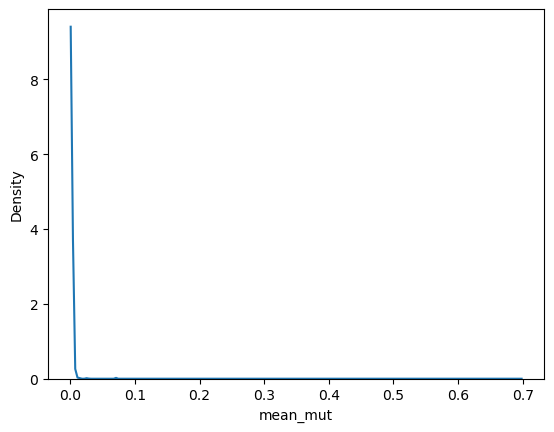

In [13]:
sns.kdeplot(mut_data['mean_mut'])

In [33]:
mut_data = mut_data[mut_data['mean_mut'] > mut_data['mean_mut'].min()]

In [34]:
mut_data.head()

,Location,mean_mut
26,chr10:101993558-101993558,0.003774
125,chr10:110510106-110510106,0.003774
311,chr10:13180503-13180503,0.003774
490,chr10:27235109-27235109,0.003774
772,chr10:68381398-68381398,0.003774


In [35]:
#new table with chr range and mean mutation
mut_data[['chr', 'pos']] = mut_data['Location'].str.split(':', expand=True)
mut_data[['start', 'end']] = mut_data['pos'].str.split('-', expand=True)
mut_data = mut_data.drop(columns=['pos', 'Location'])
mut_data.head()

ValueError: Columns must be same length as key

In [37]:
#reorder cols to fit bed 
mut_data = mut_data[['chr', 'start', 'end', 'mean_mut']]
mut_data.head()

,chr,start,end,mean_mut
26,chr10,101993558,101993558,0.003774
125,chr10,110510106,110510106,0.003774
311,chr10,13180503,13180503,0.003774
490,chr10,27235109,27235109,0.003774
772,chr10,68381398,68381398,0.003774


In [41]:
mut_data = mut_data.astype({'start' : 'int64', 'end':'int64'})

In [23]:
mut_data.dtypes

chr          object
start         int64
end           int64
mean_mut    float64
dtype: object

In [2]:
#opening methylation data
with gzip.open('TCGA-LGG.methylation450.tsv.gz', 'rt') as f:
    meth = pd.read_csv(f, sep='\t', header=0)

meth.head()

,Composite Element REF,TCGA-S9-A6WQ-01A,TCGA-DB-A64V-01A,TCGA-DU-8162-01A,TCGA-HT-7858-01A,TCGA-HT-8019-01A,TCGA-TM-A84C-01A,TCGA-S9-A6WO-01A,TCGA-TM-A84M-01A,TCGA-TQ-A7RQ-01A,TCGA-S9-A6UA-01A,TCGA-TM-A7CF-02A,TCGA-DB-A64P-01A,TCGA-HT-7485-01A,TCGA-DU-6406-01A,TCGA-S9-A6WH-01A,TCGA-WY-A858-01A,TCGA-HT-8106-01A,TCGA-TM-A84T-01A,TCGA-DU-A5TS-01A,TCGA-TM-A84H-01A,TCGA-FG-8188-01A,TCGA-DH-A66D-01A,TCGA-DU-8161-01A,TCGA-DU-A6S7-01A,TCGA-DU-A7TA-01A,TCGA-DH-A66G-01A,TCGA-DU-A6S8-01A,TCGA-FG-A710-01A,TCGA-CS-4941-01A,TCGA-R8-A6MO-01A,TCGA-DU-7007-01A,TCGA-DU-A5TU-01A,TCGA-S9-A6TX-01A,TCGA-FG-A60L-01A,TCGA-DB-A64Q-01A,TCGA-DB-A4XF-01A,TCGA-S9-A6WI-01A,TCGA-TQ-A8XE-02A,TCGA-DH-A7UT-01A,TCGA-HT-A5R7-01A,TCGA-HT-A74O-01A,TCGA-P5-A72U-01A,TCGA-HT-8105-01A,TCGA-FG-6691-01A,TCGA-DU-5870-02A,TCGA-DB-A75K-01A,TCGA-S9-A6WD-01A,TCGA-FG-8187-01A,TCGA-TM-A84J-01A,TCGA-TM-A84S-01A,TCGA-TQ-A7RF-01A,TCGA-DU-6392-01A,TCGA-QH-A6CV-01A,TCGA-DU-A7TD-01A,TCGA-HT-7474-01A,TCGA-HT-7603-01A,TCGA-S9-A7QW-01A,TCGA-HT-A619-01A,TCGA-HT-7692-01A,TCGA-DU-6405-01A,TCGA-FG-7641-01B,TCGA-FG-A711-01A,TCGA-CS-4943-01A,TCGA-DB-A64S-01A,TCGA-S9-A6U0-01A,TCGA-E1-A7Z3-01A,TCGA-E1-A7YO-01A,TCGA-TQ-A7RW-01A,TCGA-DB-A4XA-01A,TCGA-DH-A669-01A,TCGA-FG-8182-01A,TCGA-DB-A64R-01A,TCGA-HT-7881-01A,TCGA-HT-7476-01A,TCGA-TQ-A7RK-02A,TCGA-DU-A7T8-01A,TCGA-DU-6394-01A,TCGA-KT-A7W1-01A,TCGA-TM-A84F-01A,TCGA-HT-7470-01A,TCGA-DU-7009-01A,TCGA-DU-5849-01A,TCGA-RY-A845-01A,TCGA-HT-7676-01A,TCGA-DU-5870-01A,TCGA-DU-6407-02A,TCGA-HT-A618-01A,TCGA-E1-5302-01A,TCGA-DU-7010-01A,TCGA-P5-A5EV-01A,TCGA-R8-A73M-01A,TCGA-E1-A7Z4-01A,TCGA-HT-7874-01A,TCGA-HT-7607-01A,TCGA-S9-A7IY-01A,TCGA-E1-A7YD-01A,TCGA-S9-A7IQ-01A,TCGA-HT-7605-01A,TCGA-HT-7687-01A,TCGA-DU-6403-01A,TCGA-HT-7473-01A,TCGA-TQ-A7RG-01A,TCGA-P5-A72X-01A,TCGA-TM-A7CF-01A,TCGA-QH-A6CZ-01A,TCGA-WH-A86K-01A,TCGA-DU-5855-01A,TCGA-E1-A7YM-01A,TCGA-HW-8319-01A,TCGA-HW-7495-01A,TCGA-DU-6393-01A,TCGA-CS-5397-01A,TCGA-DU-6407-02B,TCGA-HT-8104-01A,TCGA-CS-6669-01A,TCGA-HT-7694-01A,TCGA-S9-A7J3-01A,TCGA-FG-8186-01A,TCGA-DB-5270-01A,TCGA-FG-A70Y-01A,TCGA-E1-A7YW-01A,TCGA-HW-7487-01A,TCGA-W9-A837-01A,TCGA-FG-6688-01A,TCGA-HT-7686-01A,TCGA-DU-6542-01A,TCGA-HT-8012-01A,TCGA-DU-6400-01A,TCGA-DU-A6S6-01A,TCGA-DU-8167-01A,TCGA-HT-7873-01B,TCGA-HT-7601-01A,TCGA-HT-7606-01A,TCGA-DU-6397-02A,TCGA-DU-A5TW-01A,TCGA-DU-7292-01A,TCGA-QH-A6X8-01A,TCGA-QH-A6CU-01A,TCGA-E1-A7YE-01A,TCGA-S9-A6U5-01A,TCGA-HT-7616-01A,TCGA-F6-A8O4-01A,TCGA-FG-A60J-01A,TCGA-HT-7471-01A,TCGA-CS-5396-01A,TCGA-QH-A65R-01A,TCGA-DB-A75O-01A,TCGA-DH-A669-02A,TCGA-WY-A85B-01A,TCGA-HT-7691-01A,TCGA-DU-6410-01A,TCGA-TQ-A7RV-01A,TCGA-HT-7604-01A,TCGA-DU-7014-01A,TCGA-S9-A7QX-01A,TCGA-HT-7680-01A,TCGA-DU-8158-01A,TCGA-HT-7688-01A,TCGA-TM-A7C3-01A,TCGA-HT-7472-01A,TCGA-F6-A8O3-01A,TCGA-VM-A8C8-01A,TCGA-FG-A4MT-01A,TCGA-TQ-A7RO-01A,TCGA-E1-A7YJ-01A,TCGA-HT-8558-01A,TCGA-HT-7479-01A,TCGA-CS-5394-01A,TCGA-P5-A780-01A,TCGA-R8-A6MK-01A,TCGA-DH-5141-01A,TCGA-DB-A64O-01A,TCGA-HT-7681-01A,TCGA-DB-A64W-01A,TCGA-FG-8181-01A,TCGA-DU-7301-01A,TCGA-VM-A8CA-01A,TCGA-QH-A6CS-01A,TCGA-VM-A8CH-01A,TCGA-DU-7298-01A,TCGA-FG-5965-02B,TCGA-DU-6404-02B,TCGA-DU-8168-01A,TCGA-DB-A4XB-01A,TCGA-DB-5278-01A,TCGA-HT-7620-01A,TCGA-TM-A7C5-01A,TCGA-HT-A615-01A,TCGA-HT-7467-01A,TCGA-WY-A85E-01A,TCGA-FG-A87N-01A,TCGA-TM-A84G-01A,TCGA-HT-7880-01A,TCGA-HT-A617-01A,TCGA-FG-6689-01A,TCGA-HT-7857-01A,TCGA-S9-A7J0-01A,TCGA-FG-A6IZ-01A,TCGA-E1-5303-01A,TCGA-DU-7302-01A,TCGA-HW-7491-01A,TCGA-RY-A83X-01A,TCGA-VM-A8CF-01A,TCGA-FG-5965-01B,TCGA-FG-5962-01B,TCGA-DU-A5TY-01A,TCGA-TQ-A7RU-01A,TCGA-HT-7693-01A,TCGA-DB-A75M-01A,TCGA-DU-A5TP-01A,TCGA-VM-A8CE-01A,TCGA-VM-A8CB-01A,TCGA-HT-A74L-01A,TCGA-HT-A4DV-01A,TCGA-HT-A61B-01A,TCGA-DU-A6S2-01A,TCGA-QH-A65X-01A,TCGA-DU-5871-01A,TCGA-VM-A8CD-01A,TCGA-HT-7610-01A,TCGA-HW-8322-01A,TCGA-P5-A5F1-01A,TCGA-DU-7011-01A,TCGA-DU-A7T6-01A,TCGA-TM-A7CA-01A,TCGA-HT-8114-01A,TCGA-DU-6395-01A,TCGA-S9-A7QZ-01A,TCGA-FG-7637-01A,TCGA-CS-5395-01A,TCGA-DU-7008-01A,TCGA-TQ-A7RV-02A,TCGA-DU-5847-01A,TCGA-S9-A7R4-01A

In [15]:
meth.shape

(485577, 535)

In [3]:
#open methyltion identifier file
meth_id = pd.read_csv('illuminaMethyl450_hg38_GDC', sep='\t', header=0)
meth_id.head()

,#id,gene,chrom,chromStart,chromEnd,strand
0,cg00000029,RBL2,chr16,53434200,53434201,.
1,cg00000165,.,chr1,90729117,90729118,.
2,cg00000236,VDAC3,chr8,42405776,42405777,.
3,cg00000289,ACTN1,chr14,68874422,68874423,.
4,cg00000292,ATP2A1,chr16,28878779,28878780,.


In [17]:
meth_id.shape

(396065, 6)

In [4]:
meth_id_filter = meth_id[['#id', 'chrom', 'chromStart', 'chromEnd', 'gene']]
meth_id_filter.head()

,#id,chrom,chromStart,chromEnd,gene
0,cg00000029,chr16,53434200,53434201,RBL2
1,cg00000165,chr1,90729117,90729118,.
2,cg00000236,chr8,42405776,42405777,VDAC3
3,cg00000289,chr14,68874422,68874423,ACTN1
4,cg00000292,chr16,28878779,28878780,ATP2A1


In [5]:
# merging methylaton table with the cg ids table
merged_meth = pd.merge(meth_id_filter, meth, left_on = '#id', right_on = 'Composite Element REF', how='inner')

#drop the id cols
merged_meth = merged_meth.drop(columns=['#id', 'Composite Element REF'])
merged_meth.head()

,chrom,chromStart,chromEnd,gene,TCGA-S9-A6WQ-01A,TCGA-DB-A64V-01A,TCGA-DU-8162-01A,TCGA-HT-7858-01A,TCGA-HT-8019-01A,TCGA-TM-A84C-01A,TCGA-S9-A6WO-01A,TCGA-TM-A84M-01A,TCGA-TQ-A7RQ-01A,TCGA-S9-A6UA-01A,TCGA-TM-A7CF-02A,TCGA-DB-A64P-01A,TCGA-HT-7485-01A,TCGA-DU-6406-01A,TCGA-S9-A6WH-01A,TCGA-WY-A858-01A,TCGA-HT-8106-01A,TCGA-TM-A84T-01A,TCGA-DU-A5TS-01A,TCGA-TM-A84H-01A,TCGA-FG-8188-01A,TCGA-DH-A66D-01A,TCGA-DU-8161-01A,TCGA-DU-A6S7-01A,TCGA-DU-A7TA-01A,TCGA-DH-A66G-01A,TCGA-DU-A6S8-01A,TCGA-FG-A710-01A,TCGA-CS-4941-01A,TCGA-R8-A6MO-01A,TCGA-DU-7007-01A,TCGA-DU-A5TU-01A,TCGA-S9-A6TX-01A,TCGA-FG-A60L-01A,TCGA-DB-A64Q-01A,TCGA-DB-A4XF-01A,TCGA-S9-A6WI-01A,TCGA-TQ-A8XE-02A,TCGA-DH-A7UT-01A,TCGA-HT-A5R7-01A,TCGA-HT-A74O-01A,TCGA-P5-A72U-01A,TCGA-HT-8105-01A,TCGA-FG-6691-01A,TCGA-DU-5870-02A,TCGA-DB-A75K-01A,TCGA-S9-A6WD-01A,TCGA-FG-8187-01A,TCGA-TM-A84J-01A,TCGA-TM-A84S-01A,TCGA-TQ-A7RF-01A,TCGA-DU-6392-01A,TCGA-QH-A6CV-01A,TCGA-DU-A7TD-01A,TCGA-HT-7474-01A,TCGA-HT-7603-01A,TCGA-S9-A7QW-01A,TCGA-HT-A619-01A,TCGA-HT-7692-01A,TCGA-DU-6405-01A,TCGA-FG-7641-01B,TCGA-FG-A711-01A,TCGA-CS-4943-01A,TCGA-DB-A64S-01A,TCGA-S9-A6U0-01A,TCGA-E1-A7Z3-01A,TCGA-E1-A7YO-01A,TCGA-TQ-A7RW-01A,TCGA-DB-A4XA-01A,TCGA-DH-A669-01A,TCGA-FG-8182-01A,TCGA-DB-A64R-01A,TCGA-HT-7881-01A,TCGA-HT-7476-01A,TCGA-TQ-A7RK-02A,TCGA-DU-A7T8-01A,TCGA-DU-6394-01A,TCGA-KT-A7W1-01A,TCGA-TM-A84F-01A,TCGA-HT-7470-01A,TCGA-DU-7009-01A,TCGA-DU-5849-01A,TCGA-RY-A845-01A,TCGA-HT-7676-01A,TCGA-DU-5870-01A,TCGA-DU-6407-02A,TCGA-HT-A618-01A,TCGA-E1-5302-01A,TCGA-DU-7010-01A,TCGA-P5-A5EV-01A,TCGA-R8-A73M-01A,TCGA-E1-A7Z4-01A,TCGA-HT-7874-01A,TCGA-HT-7607-01A,TCGA-S9-A7IY-01A,TCGA-E1-A7YD-01A,TCGA-S9-A7IQ-01A,TCGA-HT-7605-01A,TCGA-HT-7687-01A,TCGA-DU-6403-01A,TCGA-HT-7473-01A,TCGA-TQ-A7RG-01A,TCGA-P5-A72X-01A,TCGA-TM-A7CF-01A,TCGA-QH-A6CZ-01A,TCGA-WH-A86K-01A,TCGA-DU-5855-01A,TCGA-E1-A7YM-01A,TCGA-HW-8319-01A,TCGA-HW-7495-01A,TCGA-DU-6393-01A,TCGA-CS-5397-01A,TCGA-DU-6407-02B,TCGA-HT-8104-01A,TCGA-CS-6669-01A,TCGA-HT-7694-01A,TCGA-S9-A7J3-01A,TCGA-FG-8186-01A,TCGA-DB-5270-01A,TCGA-FG-A70Y-01A,TCGA-E1-A7YW-01A,TCGA-HW-7487-01A,TCGA-W9-A837-01A,TCGA-FG-6688-01A,TCGA-HT-7686-01A,TCGA-DU-6542-01A,TCGA-HT-8012-01A,TCGA-DU-6400-01A,TCGA-DU-A6S6-01A,TCGA-DU-8167-01A,TCGA-HT-7873-01B,TCGA-HT-7601-01A,TCGA-HT-7606-01A,TCGA-DU-6397-02A,TCGA-DU-A5TW-01A,TCGA-DU-7292-01A,TCGA-QH-A6X8-01A,TCGA-QH-A6CU-01A,TCGA-E1-A7YE-01A,TCGA-S9-A6U5-01A,TCGA-HT-7616-01A,TCGA-F6-A8O4-01A,TCGA-FG-A60J-01A,TCGA-HT-7471-01A,TCGA-CS-5396-01A,TCGA-QH-A65R-01A,TCGA-DB-A75O-01A,TCGA-DH-A669-02A,TCGA-WY-A85B-01A,TCGA-HT-7691-01A,TCGA-DU-6410-01A,TCGA-TQ-A7RV-01A,TCGA-HT-7604-01A,TCGA-DU-7014-01A,TCGA-S9-A7QX-01A,TCGA-HT-7680-01A,TCGA-DU-8158-01A,TCGA-HT-7688-01A,TCGA-TM-A7C3-01A,TCGA-HT-7472-01A,TCGA-F6-A8O3-01A,TCGA-VM-A8C8-01A,TCGA-FG-A4MT-01A,TCGA-TQ-A7RO-01A,TCGA-E1-A7YJ-01A,TCGA-HT-8558-01A,TCGA-HT-7479-01A,TCGA-CS-5394-01A,TCGA-P5-A780-01A,TCGA-R8-A6MK-01A,TCGA-DH-5141-01A,TCGA-DB-A64O-01A,TCGA-HT-7681-01A,TCGA-DB-A64W-01A,TCGA-FG-8181-01A,TCGA-DU-7301-01A,TCGA-VM-A8CA-01A,TCGA-QH-A6CS-01A,TCGA-VM-A8CH-01A,TCGA-DU-7298-01A,TCGA-FG-5965-02B,TCGA-DU-6404-02B,TCGA-DU-8168-01A,TCGA-DB-A4XB-01A,TCGA-DB-5278-01A,TCGA-HT-7620-01A,TCGA-TM-A7C5-01A,TCGA-HT-A615-01A,TCGA-HT-7467-01A,TCGA-WY-A85E-01A,TCGA-FG-A87N-01A,TCGA-TM-A84G-01A,TCGA-HT-7880-01A,TCGA-HT-A617-01A,TCGA-FG-6689-01A,TCGA-HT-7857-01A,TCGA-S9-A7J0-01A,TCGA-FG-A6IZ-01A,TCGA-E1-5303-01A,TCGA-DU-7302-01A,TCGA-HW-7491-01A,TCGA-RY-A83X-01A,TCGA-VM-A8CF-01A,TCGA-FG-5965-01B,TCGA-FG-5962-01B,TCGA-DU-A5TY-01A,TCGA-TQ-A7RU-01A,TCGA-HT-7693-01A,TCGA-DB-A75M-01A,TCGA-DU-A5TP-01A,TCGA-VM-A8CE-01A,TCGA-VM-A8CB-01A,TCGA-HT-A74L-01A,TCGA-HT-A4DV-01A,TCGA-HT-A61B-01A,TCGA-DU-A6S2-01A,TCGA-QH-A65X-01A,TCGA-DU-5871-01A,TCGA-VM-A8CD-01A,TCGA-HT-7610-01A,TCGA-HW-8322-01A,TCGA-P5-A5F1-01A,TCGA-DU-7011-01A,TCGA-DU-A7T6-01A,TCGA-TM-A7CA-01A,TCGA-HT-8114-01A,TCGA-DU-6395-01A,TCGA-S9-A7QZ-01A,TCGA-FG-7637-01A,TCGA-CS-5395-01A,TCGA-DU-7008-01A,TCGA-TQ-A7RV-02A,TCGA-DU-5847-01A,TCGA-S9

In [20]:
merged_meth.shape

(396065, 537)

In [6]:
merged_meth['median_meth'] = merged_meth.median(axis=1, numeric_only=True)
merged_meth.head()

,chrom,chromStart,chromEnd,gene,TCGA-S9-A6WQ-01A,TCGA-DB-A64V-01A,TCGA-DU-8162-01A,TCGA-HT-7858-01A,TCGA-HT-8019-01A,TCGA-TM-A84C-01A,TCGA-S9-A6WO-01A,TCGA-TM-A84M-01A,TCGA-TQ-A7RQ-01A,TCGA-S9-A6UA-01A,TCGA-TM-A7CF-02A,TCGA-DB-A64P-01A,TCGA-HT-7485-01A,TCGA-DU-6406-01A,TCGA-S9-A6WH-01A,TCGA-WY-A858-01A,TCGA-HT-8106-01A,TCGA-TM-A84T-01A,TCGA-DU-A5TS-01A,TCGA-TM-A84H-01A,TCGA-FG-8188-01A,TCGA-DH-A66D-01A,TCGA-DU-8161-01A,TCGA-DU-A6S7-01A,TCGA-DU-A7TA-01A,TCGA-DH-A66G-01A,TCGA-DU-A6S8-01A,TCGA-FG-A710-01A,TCGA-CS-4941-01A,TCGA-R8-A6MO-01A,TCGA-DU-7007-01A,TCGA-DU-A5TU-01A,TCGA-S9-A6TX-01A,TCGA-FG-A60L-01A,TCGA-DB-A64Q-01A,TCGA-DB-A4XF-01A,TCGA-S9-A6WI-01A,TCGA-TQ-A8XE-02A,TCGA-DH-A7UT-01A,TCGA-HT-A5R7-01A,TCGA-HT-A74O-01A,TCGA-P5-A72U-01A,TCGA-HT-8105-01A,TCGA-FG-6691-01A,TCGA-DU-5870-02A,TCGA-DB-A75K-01A,TCGA-S9-A6WD-01A,TCGA-FG-8187-01A,TCGA-TM-A84J-01A,TCGA-TM-A84S-01A,TCGA-TQ-A7RF-01A,TCGA-DU-6392-01A,TCGA-QH-A6CV-01A,TCGA-DU-A7TD-01A,TCGA-HT-7474-01A,TCGA-HT-7603-01A,TCGA-S9-A7QW-01A,TCGA-HT-A619-01A,TCGA-HT-7692-01A,TCGA-DU-6405-01A,TCGA-FG-7641-01B,TCGA-FG-A711-01A,TCGA-CS-4943-01A,TCGA-DB-A64S-01A,TCGA-S9-A6U0-01A,TCGA-E1-A7Z3-01A,TCGA-E1-A7YO-01A,TCGA-TQ-A7RW-01A,TCGA-DB-A4XA-01A,TCGA-DH-A669-01A,TCGA-FG-8182-01A,TCGA-DB-A64R-01A,TCGA-HT-7881-01A,TCGA-HT-7476-01A,TCGA-TQ-A7RK-02A,TCGA-DU-A7T8-01A,TCGA-DU-6394-01A,TCGA-KT-A7W1-01A,TCGA-TM-A84F-01A,TCGA-HT-7470-01A,TCGA-DU-7009-01A,TCGA-DU-5849-01A,TCGA-RY-A845-01A,TCGA-HT-7676-01A,TCGA-DU-5870-01A,TCGA-DU-6407-02A,TCGA-HT-A618-01A,TCGA-E1-5302-01A,TCGA-DU-7010-01A,TCGA-P5-A5EV-01A,TCGA-R8-A73M-01A,TCGA-E1-A7Z4-01A,TCGA-HT-7874-01A,TCGA-HT-7607-01A,TCGA-S9-A7IY-01A,TCGA-E1-A7YD-01A,TCGA-S9-A7IQ-01A,TCGA-HT-7605-01A,TCGA-HT-7687-01A,TCGA-DU-6403-01A,TCGA-HT-7473-01A,TCGA-TQ-A7RG-01A,TCGA-P5-A72X-01A,TCGA-TM-A7CF-01A,TCGA-QH-A6CZ-01A,TCGA-WH-A86K-01A,TCGA-DU-5855-01A,TCGA-E1-A7YM-01A,TCGA-HW-8319-01A,TCGA-HW-7495-01A,TCGA-DU-6393-01A,TCGA-CS-5397-01A,TCGA-DU-6407-02B,TCGA-HT-8104-01A,TCGA-CS-6669-01A,TCGA-HT-7694-01A,TCGA-S9-A7J3-01A,TCGA-FG-8186-01A,TCGA-DB-5270-01A,TCGA-FG-A70Y-01A,TCGA-E1-A7YW-01A,TCGA-HW-7487-01A,TCGA-W9-A837-01A,TCGA-FG-6688-01A,TCGA-HT-7686-01A,TCGA-DU-6542-01A,TCGA-HT-8012-01A,TCGA-DU-6400-01A,TCGA-DU-A6S6-01A,TCGA-DU-8167-01A,TCGA-HT-7873-01B,TCGA-HT-7601-01A,TCGA-HT-7606-01A,TCGA-DU-6397-02A,TCGA-DU-A5TW-01A,TCGA-DU-7292-01A,TCGA-QH-A6X8-01A,TCGA-QH-A6CU-01A,TCGA-E1-A7YE-01A,TCGA-S9-A6U5-01A,TCGA-HT-7616-01A,TCGA-F6-A8O4-01A,TCGA-FG-A60J-01A,TCGA-HT-7471-01A,TCGA-CS-5396-01A,TCGA-QH-A65R-01A,TCGA-DB-A75O-01A,TCGA-DH-A669-02A,TCGA-WY-A85B-01A,TCGA-HT-7691-01A,TCGA-DU-6410-01A,TCGA-TQ-A7RV-01A,TCGA-HT-7604-01A,TCGA-DU-7014-01A,TCGA-S9-A7QX-01A,TCGA-HT-7680-01A,TCGA-DU-8158-01A,TCGA-HT-7688-01A,TCGA-TM-A7C3-01A,TCGA-HT-7472-01A,TCGA-F6-A8O3-01A,TCGA-VM-A8C8-01A,TCGA-FG-A4MT-01A,TCGA-TQ-A7RO-01A,TCGA-E1-A7YJ-01A,TCGA-HT-8558-01A,TCGA-HT-7479-01A,TCGA-CS-5394-01A,TCGA-P5-A780-01A,TCGA-R8-A6MK-01A,TCGA-DH-5141-01A,TCGA-DB-A64O-01A,TCGA-HT-7681-01A,TCGA-DB-A64W-01A,TCGA-FG-8181-01A,TCGA-DU-7301-01A,TCGA-VM-A8CA-01A,TCGA-QH-A6CS-01A,TCGA-VM-A8CH-01A,TCGA-DU-7298-01A,TCGA-FG-5965-02B,TCGA-DU-6404-02B,TCGA-DU-8168-01A,TCGA-DB-A4XB-01A,TCGA-DB-5278-01A,TCGA-HT-7620-01A,TCGA-TM-A7C5-01A,TCGA-HT-A615-01A,TCGA-HT-7467-01A,TCGA-WY-A85E-01A,TCGA-FG-A87N-01A,TCGA-TM-A84G-01A,TCGA-HT-7880-01A,TCGA-HT-A617-01A,TCGA-FG-6689-01A,TCGA-HT-7857-01A,TCGA-S9-A7J0-01A,TCGA-FG-A6IZ-01A,TCGA-E1-5303-01A,TCGA-DU-7302-01A,TCGA-HW-7491-01A,TCGA-RY-A83X-01A,TCGA-VM-A8CF-01A,TCGA-FG-5965-01B,TCGA-FG-5962-01B,TCGA-DU-A5TY-01A,TCGA-TQ-A7RU-01A,TCGA-HT-7693-01A,TCGA-DB-A75M-01A,TCGA-DU-A5TP-01A,TCGA-VM-A8CE-01A,TCGA-VM-A8CB-01A,TCGA-HT-A74L-01A,TCGA-HT-A4DV-01A,TCGA-HT-A61B-01A,TCGA-DU-A6S2-01A,TCGA-QH-A65X-01A,TCGA-DU-5871-01A,TCGA-VM-A8CD-01A,TCGA-HT-7610-01A,TCGA-HW-8322-01A,TCGA-P5-A5F1-01A,TCGA-DU-7011-01A,TCGA-DU-A7T6-01A,TCGA-TM-A7CA-01A,TCGA-HT-8114-01A,TCGA-DU-6395-01A,TCGA-S9-A7QZ-01A,TCGA-FG-7637-01A,TCGA-CS-5395-01A,TCGA-DU-7008-01A,TCGA-TQ-A7RV-02A,TCGA-DU-5847-01A,TCGA-S9

In [7]:
#extracting meth data with chr regions
meth_data = merged_meth[['chrom', 'chromStart', 'chromEnd', 'median_meth', 'gene']]
meth_data.head()

,chrom,chromStart,chromEnd,median_meth,gene
0,chr16,53434200,53434201,0.820334,RBL2
1,chr1,90729117,90729118,0.234424,.
2,chr8,42405776,42405777,0.910834,VDAC3
3,chr14,68874422,68874423,0.710930,ACTN1
4,chr16,28878779,28878780,0.834522,ATP2A1


In [10]:
meth_data[meth_data['chromStart'].isin([-1]) == False].to_csv(

(393520, 5)

In [23]:
#writing mut and meth data to files
mut_data.to_csv('mutation.bed', index=False, sep='\t', header=False)
meth_data.to_csv('methylation.bed', index=False, sep='\t', header=False)

## After merging with bedtools

In [5]:
mut_meth = pd.read_table("mut_meth.bed", header=None)
mut_meth.head()

,0,1,2,3,4,5,6,7
0,chr10,100081546,100081546,0.001969,chr10,100081546,100081547,0.985567
1,chr10,102109992,102109992,0.001969,chr10,102109991,102109992,0.824580
2,chr10,112815332,112815332,0.001969,chr10,112815332,112815333,0.975832
3,chr10,119037240,119037240,0.001969,chr10,119037239,119037240,0.926192
4,chr10,119672602,119672602,0.001969,chr10,119672601,119672602,0.874748


In [19]:
mut_meth.shape

(462, 8)

In [20]:
mut_meth[mut_meth[3]>0.002]

,0,1,2,3,4,5,6,7
153,chr17,7675994,7675994,0.003937,chr17,7675994,7675995,0.800393
264,chr22,41467522,41467522,0.003937,chr22,41467521,41467522,0.559392


<Axes: xlabel='3', ylabel='7'>

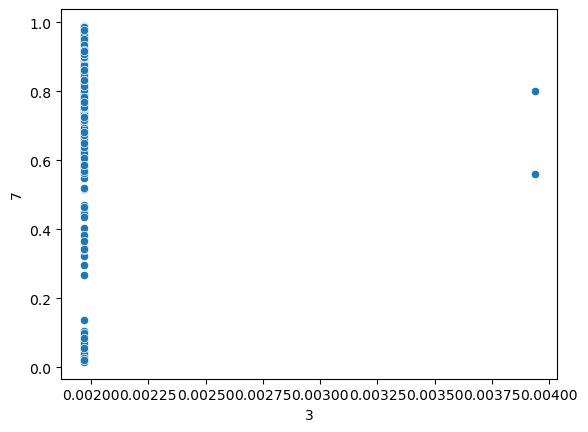

In [21]:
sns.scatterplot(x=mut_meth[3], y=mut_meth[7])

In [25]:
#windiw size
#different cancer

In [26]:
#chr22: https://www.proteinatlas.org/ENSG00000100410-PHF5A/pathology/glioma
#cjr17: tp53

In [6]:
#larger window size
mut1t_meth = pd.read_table('mut1twindow_meth.bed', header=None)
mut1h_meth = pd.read_table('mut1hwindow_meth.bed', header=None)
mut1k_meth = pd.read_table('mut1kwindow_meth.bed', header=None)
mut10k_meth = pd.read_table('mut10kwindow_meth.bed', header=None)
mut100k_meth = pd.read_table('mut100kwindow_meth.bed', header=None)

In [31]:
annotate_gene = pd.merge(mut10k_meth, df, left_on = [0, 1, 2], right_on = ["chrom", "start", "end"], how='inner')
annotate_gene.head()

,0,1,2,3,4,5,6,7,Sample_ID,gene,chrom,start,end,ref,alt,Amino_Acid_Change,effect,filter,dna_vaf,Location
0,chr10,100057060,100057060,0.001969,chr10,100065428,100065429,0.603098,TCGA-DU-6392-01A,CPN1,chr10,100057060,100057060,G,A,p.R322W,missense_variant,PASS,0.068826,chr10:100057060-100057060
1,chr10,100057060,100057060,0.001969,chr10,100065272,100065273,0.496425,TCGA-DU-6392-01A,CPN1,chr10,100057060,100057060,G,A,p.R322W,missense_variant,PASS,0.068826,chr10:100057060-100057060
2,chr10,100057060,100057060,0.001969,chr10,100065298,100065299,0.399606,TCGA-DU-6392-01A,CPN1,chr10,100057060,100057060,G,A,p.R322W,missense_variant,PASS,0.068826,chr10:100057060-100057060
3,chr10,100057060,100057060,0.001969,chr10,100065361,100065362,0.868378,TCGA-DU-6392-01A,CPN1,chr10,100057060,100057060,G,A,p.R322W,missense_variant,PASS,0.068826,chr10:100057060-100057060
4,chr10,100057060,100057060,0.001969,chr10,100066955,100066956,0.904324,TCGA-DU-6392-01A,CPN1,chr10,100057060,100057060,G,A,p.R322W,missense_variant,PASS,0.068826,chr10:100057060-100057060


In [32]:
annotate_gene.shape

(314633, 20)

In [35]:
gene_counts = pd.DataFrame(annotate_gene['gene'].value_counts())

In [38]:
hitlist = annotate_gene['gene'].unique().tolist()
hitlist

['CPN1',
 'CHUK',
 'PKD2L1',
 'SCD',
 'WNT8B',
 'SEC31B',
 'HIF1AN',
 'PAX2',
 'FAM178A',
 'MRPL43',
 'C10orf2',
 'LZTS2',
 'PDZD7',
 'BTRC',
 'POLL',
 'GTPBP4',
 'FBXW4',
 'MGEA5',
 'HPS6',
 'LDB1',
 'PPRC1',
 'NOLC1',
 'ELOVL3',
 'GBF1',
 'NFKB2',
 'PSD',
 'CUEDC2',
 'TMEM180',
 'SUFU',
 'TRIM8',
 'WBP1L',
 'CNNM2',
 'NT5C2',
 'RPEL1',
 'INA',
 'PCGF6',
 'TAF5',
 'PDCD11',
 'CALHM2',
 'CALHM1',
 'NEURL1',
 'SH3PXD2A',
 'OBFC1',
 'COL17A1',
 'SFR1',
 'CFAP43',
 'ITPRIP',
 'IDI1',
 'CFAP58',
 'SORCS3',
 'SORCS1',
 'XPNPEP1',
 'ADD3',
 'WDR37',
 'DUSP5',
 'SMC3',
 'PDCD4',
 'SHOC2',
 'ADRA2A',
 'GPAM',
 'TECTB',
 'ZDHHC6',
 'VTI1A',
 'TCF7L2',
 'CELF2',
 'HABP2',
 'NRAP',
 'CASP7',
 'DCLRE1A',
 'TDRD1',
 'VWA2',
 'AFAP1L2',
 'ABLIM1',
 'USP6NL',
 'FAM160B1',
 'GFRA1',
 'PNLIP',
 'PNLIPRP1',
 'HSPA12A',
 'VAX1',
 'KCNK18',
 'SLC18A2',
 'PDZD8',
 'EMX2',
 'RAB11FIP2',
 'PRLHR',
 'PROSER2',
 'CACUL1',
 'EIF3A',
 'UPF2',
 'GRK5',
 'RGS10',
 'TIAL1',
 'BAG3',
 'INPP5F',
 'MCMBP',
 'WDR11',
 

In [39]:
len(hitlist)

11924

In [40]:
annotate_gene = pd.merge(mut1k_meth, df, left_on = [0, 1, 2], right_on = ["chrom", "start", "end"], how='inner')
annotate_gene.shape

(53570, 20)

In [41]:
hitlist = annotate_gene['gene'].unique().tolist()
len(hitlist)

8153

In [12]:
annotate_gene = pd.merge(mut1k_meth[mut1k_meth[3]>0.002], df, left_on = [0, 1, 2], right_on = ["chrom", "start", "end"], how='inner')
annotate_gene.shape

(633, 20)

In [11]:
hitlist0 = annotate_gene['gene'].unique().tolist()
len(hitlist0)

2

In [13]:
hitlist1t = annotate_gene['gene'].unique().tolist()
len(hitlist1t)

5

In [15]:
hitlist1h = annotate_gene['gene'].unique().tolist()
len(hitlist1h)

14

In [13]:
hitlist1k = annotate_gene['gene'].unique().tolist()
len(hitlist1k)

43

In [19]:
hitlist10k = annotate_gene['gene'].unique().tolist()
len(hitlist10k)

95

In [9]:
hitlist100k = annotate_gene['gene'].unique().tolist()
len(hitlist100k)

111

In [23]:
window = [1, 10, 100, 1000, 10000, 100000]
gene_count = [len(hitlist0), len(hitlist1t), len(hitlist1h), len(hitlist1k), len(hitlist10k), len(hitlist100k)]
unique_df = pd.DataFrame({'Window':window, 'Gene counts':gene_count})
unique_df

,Window,Gene counts
0,1,2
1,10,5
2,100,14
3,1000,43
4,10000,95
5,100000,111


Text(0, 0.5, 'No of unique genes')

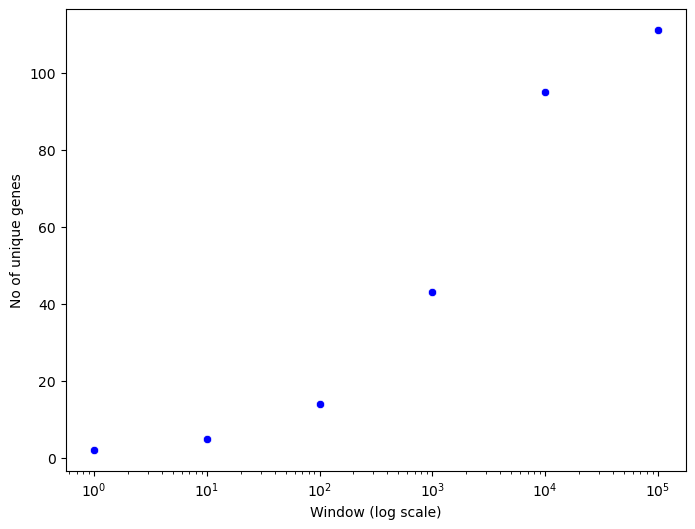

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Window', y='Gene counts', data=unique_df, marker='o', color='b')
plt.xscale('log')  # Set x-axis to log scale
plt.xlabel('Window (log scale)')
plt.ylabel('No of unique genes')

In [14]:
hitlist1k

['ANO9',
 'OR51T1',
 'GLYAT',
 'OR2AG2',
 'PTPN11',
 'ARID2',
 'PCDH20',
 'FBXL3',
 'DHRS2',
 'ADCY4',
 'NF1',
 'KRT25',
 'KRT15',
 'KIF2B',
 'DDX5',
 'TP53',
 'SLC38A10',
 'CTIF',
 'CIC',
 'EDARADD',
 'OR2T2',
 'OR2T11',
 'FAM167B',
 'PLCG1',
 'SEMG1',
 'PHF5A',
 'COL6A3',
 'C2orf71',
 'VAMP5',
 'ZBTB20',
 'USP38',
 'PDCL2',
 'SULT1E1',
 'SDHA',
 'Y_RNA',
 'BRAF',
 'EGFR',
 'PCLO',
 'COL5A1',
 'NOTCH1',
 'TLE1',
 'ZCCHC12',
 'COX7B']

In [23]:
mut1k_meth.shape

(53166, 8)

In [24]:
mut1k_meth[mut1k_meth[3]>0.01]

,0,1,2,3,4,5,6,7
16393,chr17,7673776,7673776,0.013780,chr17,7673772,7673773,0.939263
16403,chr17,7673802,7673802,0.025591,chr17,7673772,7673773,0.939263
16404,chr17,7673803,7673803,0.090551,chr17,7673772,7673773,0.939263
16417,chr17,7674220,7674220,0.015748,chr17,7673772,7673773,0.939263
16418,chr17,7674221,7674221,0.011811,chr17,7673772,7673773,0.939263
16440,chr17,7674872,7674872,0.019685,chr17,7675729,7675730,0.716471
16441,chr17,7674872,7674872,0.019685,chr17,7675371,7675372,0.936207
16489,chr17,7675076,7675076,0.013780,chr17,7675729,7675730,0.716471
16490,chr17,7675076,7675076,0.013780,chr17,7675371,7675372,0.936207
16491,chr17,7675076,7675076,0.013780,chr17,7675994,7675995,0.800393


<Axes: xlabel='3', ylabel='7'>

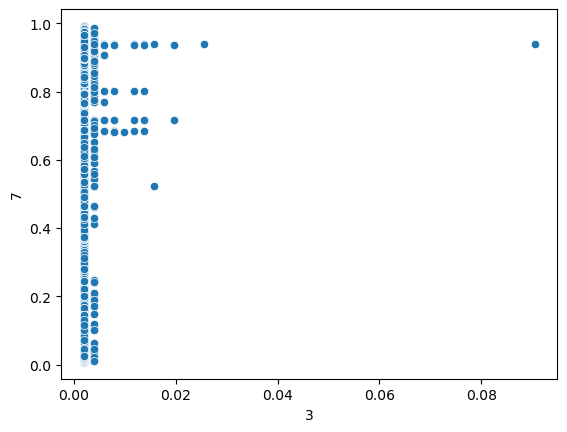

In [25]:
sns.scatterplot(x=mut1k_meth[3], y=mut1k_meth[7])

In [26]:
#larger window size
mut10k_meth = pd.read_table('mut10kwindow_meth.bed', header=None)
mut10k_meth.shape

(306688, 8)

In [13]:
mut10k_meth[mut10k_meth[3]>0.002].shape

(1541, 8)

<Axes: xlabel='3', ylabel='7'>

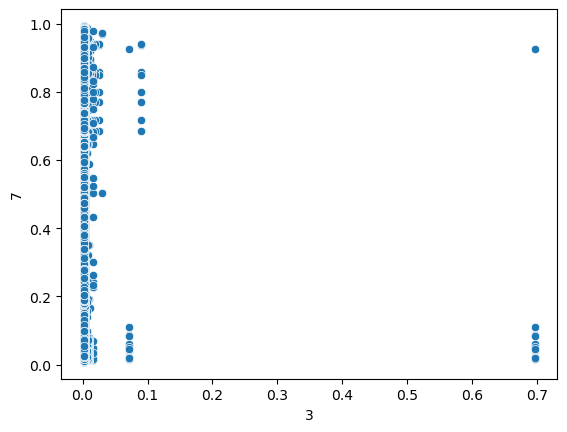

In [14]:
sns.scatterplot(x=mut10k_meth[3], y=mut10k_meth[7])

## Breast cancer

In [16]:
with gzip.open('TCGA-BRCA.mutect2_snv.tsv.gz', 'rt') as f:
    df_bc = pd.read_csv(f, sep='\t', header=0)

df_bc.head()

,Sample_ID,gene,chrom,start,end,ref,alt,Amino_Acid_Change,effect,filter,dna_vaf
0,TCGA-D8-A1XY-01A,USP24,chr1,55159655,55159655,T,C,p.I342V,missense_variant,panel_of_normals,0.402439
1,TCGA-D8-A1XY-01A,ERICH3,chr1,74571494,74571494,C,T,p.E1406K,missense_variant,PASS,0.511628
2,TCGA-D8-A1XY-01A,KIF26B,chr1,245419680,245419680,G,T,p.S367S,synonymous_variant,PASS,0.658824
3,TCGA-D8-A1XY-01A,USP34,chr2,61189055,61189055,G,C,p.L3296L,synonymous_variant,PASS,0.234899
4,TCGA-D8-A1XY-01A,ANTXR1,chr2,69245305,69245305,G,A,p.S505S,synonymous_variant,PASS,0.239583


In [18]:
df_bc['Location'] = df_bc['chrom'].astype(str) + ':' + df_bc['start'].astype(str) + '-' + df_bc['end'].astype(str)

df_bc.shape

(120988, 12)

In [19]:
# Get unique sample IDs
unique_sample_ids = df_bc['Sample_ID'].unique()

len(unique_sample_ids)

986

In [20]:
#filter out the columns of interest
dfbc_filter = df_bc[['Sample_ID', 'Location']]

dfbc_filter.head()

,Sample_ID,Location
0,TCGA-D8-A1XY-01A,chr1:55159655-55159655
1,TCGA-D8-A1XY-01A,chr1:74571494-74571494
2,TCGA-D8-A1XY-01A,chr1:245419680-245419680
3,TCGA-D8-A1XY-01A,chr2:61189055-61189055
4,TCGA-D8-A1XY-01A,chr2:69245305-69245305


In [21]:
new_dfbc = pd.crosstab(index=dfbc_filter['Location'], columns=dfbc_filter['Sample_ID'])
new_dfbc.shape

(119319, 986)

In [23]:
#calculating mean mutations
new_dfbc['mean_mut'] = new_dfbc.select_dtypes(include='number').mean(axis=1)
bc_mut = new_dfbc[['mean_mut']]
bc_mut.head()

Sample_ID,mean_mut
Location,
chr10:100048805-100048805,0.001014
chr10:100063649-100063649,0.001014
chr10:100075915-100075915,0.001014
chr10:100076053-100076053,0.001014
chr10:1000835-1000835,0.001014


In [24]:
bc_mut = bc_mut.reset_index()
bc_mut = bc_mut.rename_axis(None, axis=1)
bc_mut.head()

,Location,mean_mut
0,chr10:100048805-100048805,0.001014
1,chr10:100063649-100063649,0.001014
2,chr10:100075915-100075915,0.001014
3,chr10:100076053-100076053,0.001014
4,chr10:1000835-1000835,0.001014


<Axes: xlabel='mean_mut', ylabel='Density'>

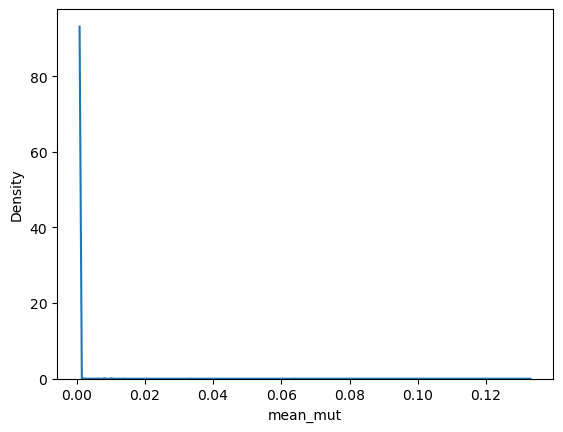

In [25]:
sns.kdeplot(bc_mut['mean_mut'])

In [26]:
#new table with chr range and mean mutation
bc_mut[['chr', 'pos']] = bc_mut['Location'].str.split(':', expand=True)
bc_mut[['start', 'end']] = bc_mut['pos'].str.split('-', expand=True)
bc_mut = bc_mut.drop(columns=['pos', 'Location'])
bc_mut.head()

,mean_mut,chr,start,end
0,0.001014,chr10,100048805,100048805
1,0.001014,chr10,100063649,100063649
2,0.001014,chr10,100075915,100075915
3,0.001014,chr10,100076053,100076053
4,0.001014,chr10,1000835,1000835


In [27]:
#reorder cols to fit bed 
bc_mut = bc_mut[['chr', 'start', 'end', 'mean_mut']]


In [28]:
with gzip.open('TCGA-BRCA.methylation450.tsv.gz', 'rt') as f:
    bc_meth = pd.read_csv(f, sep='\t', header=0)

bc_meth.shape

(485577, 891)

In [29]:
bc_meth.head()

,Composite Element REF,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-AR-A24O-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,TCGA-E2-A1LS-01A,TCGA-E9-A1RB-01A,TCGA-BH-A203-11A,TCGA-D8-A1X9-01A,TCGA-E9-A1RH-11A,TCGA-5L-AAT0-01A,TCGA-AO-A12C-01A,TCGA-V7-A7HQ-01A,TCGA-A2-A1FZ-01A,TCGA-AR-A251-01A,TCGA-BH-A0B9-01A,TCGA-EW-A1PF-01A,TCGA-AR-A24S-01A,TCGA-AC-A23H-11A,TCGA-E2-A1LL-01A,TCGA-AC-A2QJ-01A,TCGA-A8-A08O-01A,TCGA-XX-A899-01A,TCGA-D8-A1XK-01A,TCGA-AC-A5XS-01A,TCGA-AO-A125-01A,TCGA-AR-A0TX-01A,TCGA-AC-A3OD-01A,TCGA-4H-AAAK-01A,TCGA-E9-A24A-01A,TCGA-LL-A6FQ-01A,TCGA-AR-A24Q-01A,TCGA-AR-A2LE-01A,TCGA-AR-A0U4-01A,TCGA-GM-A2DN-01A,TCGA-A7-A13D-01A,TCGA-D8-A1JG-01B,TCGA-E2-A570-01A,TCGA-A7-A6VV-01A,TCGA-AO-A0JJ-01A,TCGA-E2-A10E-01A,TCGA-E9-A1N4-11A,TCGA-A7-A3IZ-01A,TCGA-A2-A0YH-01A,TCGA-D8-A1JM-01A,TCGA-OL-A5RX-01A,TCGA-BH-A1ET-11B,TCGA-E2-A1L8-01A,TCGA-OL-A5RV-01A,TCGA-AC-A2FM-01A,TCGA-AO-A0JM-01A,TCGA-BH-A0DP-01A,TCGA-A2-A25E-01A,TCGA-B6-A2IU-01A,TCGA-D8-A27T-01A,TCGA-A2-A0SW-01A,TCGA-E2-A107-01A,TCGA-E2-A1B6-01A,TCGA-D8-A1XW-01A,TCGA-GM-A4E0-01A,TCGA-EW-A6SD-01A,TCGA-E9-A6HE-01A,TCGA-AR-A5QP-01A,TCGA-AC-A62X-01A,TCGA-BH-A42V-01A,TCGA-B6-A0RS-01A,TCGA-D8-A1JL-01A,TCGA-BH-A209-11A,TCGA-A2-A0EU-01A,TCGA-B6-A1KC-01B,TCGA-BH-A0BA-11A,TCGA-GM-A3XN-01A,TCGA-LD-A66U-01A,TCGA-D8-A1J8-01A,TCGA-OL-A66P-01A,TCGA-E9-A1ND-01A,TCGA-A7-A5ZX-01A,TCGA-A2-A1G1-01A,TCGA-A2-A0SU-01A,TCGA-E2-A1LB-01A,TCGA-E9-A1RD-01A,TCGA-OL-A6VQ-01A,TCGA-AQ-A1H3-01A,TCGA-WT-AB44-01A,TCGA-B6-A402-01A,TCGA-BH-A0B8-11A,TCGA-BH-A1F5-01A,TCGA-AC-A3HN-01A,TCGA-BH-A1FG-01A,TCGA-UL-AAZ6-01A,TCGA-AR-A255-01A,TCGA-LD-A7W6-01A,TCGA-AR-A24Z-01A,TCGA-A1-A0SO-01A,TCGA-A2-A3XS-01A,TCGA-D8-A1X6-01A,TCGA-C8-A1HF-01A,TCGA-A7-A3J0-01A,TCGA-AC-A23C-01A,TCGA-S3-A6ZH-01A,TCGA-BH-A0B8-01A,TCGA-BH-A1F5-11A,TCGA-AR-A1AX-01A,TCGA-D8-A1XO-01A,TCGA-E9-A1R2-01A,TCGA-BH-A1EU-01A,TCGA-AC-A2QH-01B,TCGA-LL-A5YM-01A,TCGA-EW-A1IY-01A,TCGA-AR-A1AR-01A,TCGA-EW-A1J5-01A,TCGA-B6-A0WV-01A,TCGA-BH-A1FN-01A,TCGA-BH-A0E0-11A,TCGA-AR-A24N-01A,TCGA-A2-A0CO-01A,TCGA-OL-A66N-01A,TCGA-AC-A3QP-01A,TCGA-B6-A0RM-01A,TCGA-D8-A1JS-01A,TCGA-E9-A1RB-11A,TCGA-A7-A26J-01A,TCGA-A7-A13H-01A,TCGA-AO-A126-01A,TCGA-BH-A6R8-01A,TCGA-B6-A0RG-01A,TCGA-AC-A3TM-01A,TCGA-AR-A0TQ-01A,TCGA-GM-A2DH-01A,TCGA-B6-A0RI-01A,TCGA-A2-A1G0-01A,TCGA-AO-A124-01A,TCGA-A2-A1FX-01A,TCGA-A7-A26G-01A,TCGA-E2-A1LI-01A,TCGA-BH-A0HA-01A,TCGA-AO-A1KR-01A,TCGA-3C-AALK-01A,TCGA-AC-A6IX-01A,TCGA-E2-A1IH-01A,TCGA-XX-A89A-01A,TCGA-E9-A1RH-01A,TCGA-E9-A1N3-01A,TCGA-AC-A8OR-01A,TCGA-AO-A0JB-01A,TCGA-AC-A6IV-01A,TCGA-AR-A1AY-01A,TCGA-BH-A0GY-01A,TCGA-AR-A2LL-01A,TCGA-BH-A208-01A,TCGA-EW-A1PE-01A,TCGA-E2-A1B1-01A,TCGA-BH-A0C0-01A,TCGA-PE-A5DD-01A,TCGA-AR-A2LH-01A,TCGA-BH-A0H0-01A,TCGA-BH-A6R9-01A,TCGA-5L-AAT1-01A,TCGA-BH-A0B3-11B,TCGA-AC-A3BB-01A,TCGA-AR-A0TT-01A,TCGA-EW-A6SB-01A,TCGA-AC-A62V-01A,TCGA-D8-A1XQ-01A,TCGA-BH-A0DD-01A,TCGA-Z7-A8R6-01A,TCGA-OL-A5DA-01A,TCGA-WT-AB41-01A,TCGA-E2-A1LA-01A,TCGA-E2-A1L9-01A,TCGA-LL-A73Y-01A,TCGA-D8-A1XU-01A,TCGA-B6-A0RT-01A,TCGA-BH-A0DK-01A,TCGA-LL-A7SZ-01A,TCGA-C8-A26Y-01A,TCGA-LD-A74U-01A,TCGA-A7-A0CE-11A,TCGA-BH-A1ET-01A,TCGA-A7-A2KD-01A,TCGA-D8-A1JE-01A,TCGA-B6-A0WX-01A,TCGA-A7-A4SB-01A,TCGA-EW-A1J1-01A,TCGA-A2-A0YM-01A,TCGA-AR-A24X-01A,TCGA-A2-A0SY-01A,TCGA-B6-A0RU-01A,TCGA-E2-A1IO-01A,TCGA-PL-A8LZ-01A,TCGA-B6-A1KI-01A,TCGA-B6-A401-01A,TCGA-PL-A8LV-01A,TCGA-BH-A0C3-11A,TCGA-A2-A0EN-01A,TCGA-OL-A5D7-01A,TCGA-BH-A1FH-01A,TCGA-GM-A3XL-01A,TCGA-E2-A1LI-11A,TCGA-W8-A86G-01A,TCGA-BH-A0DH-01A,TCGA-BH-A0HK-01A,TCGA-BH-A42U-01A,TCGA-AR-A1AO-01A,TCGA-Z7-A8R5-01A,TCGA-B6-A0I1-01A,TCGA-E2-A1BC-01A,TCGA-EW-A1PA-01A,TCGA-BH-A0W4-01A,TCGA-A2-A3XZ-01A,TCGA-E2-A1B0-01A,TCGA-AC-A8OS-01A,TCGA-AC-A23H-01A,TCGA-EW-A1P4-01A,TCGA-E2-A1IG-01A,TCGA-EW-A1P0-01A,TCGA-GM-A3XG-01A,TCGA-A2-A25B-01A,TCGA-AC-A3QQ-01A,TCGA-AR-A5QM-01A,TCGA-BH-A0BS-01A,TCGA-D8-A3Z6-01A,TCGA-EW-A1P5-01A,TCGA-AO-A1KT-01A,TCGA-E9-A22D-01A,TCGA-AR-A1AS-01A,TCGA-E2-A1IE-01A,TCGA-E2-A1AZ-01A,TCGA-D8-A27N-01A,TCGA-A2-A0CT-01A,TCGA-B6-A0RE-01A,TCGA-E9-A249-01A,TCGA-A2-A25A-01A,TCGA-E9-A22A-01A

In [30]:
#open methylation identifier file
bcmeth_id = pd.read_csv('illuminaMethyl450_hg38_GDC_BC', sep='\t', header=0)
bcmeth_id.head()

,#id,gene,chrom,chromStart,chromEnd,strand
0,cg00000029,RBL2,chr16,53434200,53434201,.
1,cg00000165,.,chr1,90729117,90729118,.
2,cg00000236,VDAC3,chr8,42405776,42405777,.
3,cg00000289,ACTN1,chr14,68874422,68874423,.
4,cg00000292,ATP2A1,chr16,28878779,28878780,.


In [31]:
bcmeth_id_filter = bcmeth_id[['#id', 'chrom', 'chromStart', 'chromEnd']]
bcmeth_id_filter.head()

,#id,chrom,chromStart,chromEnd
0,cg00000029,chr16,53434200,53434201
1,cg00000165,chr1,90729117,90729118
2,cg00000236,chr8,42405776,42405777
3,cg00000289,chr14,68874422,68874423
4,cg00000292,chr16,28878779,28878780


In [32]:
# merging methylaton table with the cg ids table
merged_meth_bc = pd.merge(bcmeth_id_filter, bc_meth, left_on = '#id', right_on = 'Composite Element REF', how='inner')

#drop the id cols
merged_meth_bc = merged_meth_bc.drop(columns=['#id', 'Composite Element REF'])
merged_meth_bc.head()

,chrom,chromStart,chromEnd,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-AR-A24O-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,TCGA-E2-A1LS-01A,TCGA-E9-A1RB-01A,TCGA-BH-A203-11A,TCGA-D8-A1X9-01A,TCGA-E9-A1RH-11A,TCGA-5L-AAT0-01A,TCGA-AO-A12C-01A,TCGA-V7-A7HQ-01A,TCGA-A2-A1FZ-01A,TCGA-AR-A251-01A,TCGA-BH-A0B9-01A,TCGA-EW-A1PF-01A,TCGA-AR-A24S-01A,TCGA-AC-A23H-11A,TCGA-E2-A1LL-01A,TCGA-AC-A2QJ-01A,TCGA-A8-A08O-01A,TCGA-XX-A899-01A,TCGA-D8-A1XK-01A,TCGA-AC-A5XS-01A,TCGA-AO-A125-01A,TCGA-AR-A0TX-01A,TCGA-AC-A3OD-01A,TCGA-4H-AAAK-01A,TCGA-E9-A24A-01A,TCGA-LL-A6FQ-01A,TCGA-AR-A24Q-01A,TCGA-AR-A2LE-01A,TCGA-AR-A0U4-01A,TCGA-GM-A2DN-01A,TCGA-A7-A13D-01A,TCGA-D8-A1JG-01B,TCGA-E2-A570-01A,TCGA-A7-A6VV-01A,TCGA-AO-A0JJ-01A,TCGA-E2-A10E-01A,TCGA-E9-A1N4-11A,TCGA-A7-A3IZ-01A,TCGA-A2-A0YH-01A,TCGA-D8-A1JM-01A,TCGA-OL-A5RX-01A,TCGA-BH-A1ET-11B,TCGA-E2-A1L8-01A,TCGA-OL-A5RV-01A,TCGA-AC-A2FM-01A,TCGA-AO-A0JM-01A,TCGA-BH-A0DP-01A,TCGA-A2-A25E-01A,TCGA-B6-A2IU-01A,TCGA-D8-A27T-01A,TCGA-A2-A0SW-01A,TCGA-E2-A107-01A,TCGA-E2-A1B6-01A,TCGA-D8-A1XW-01A,TCGA-GM-A4E0-01A,TCGA-EW-A6SD-01A,TCGA-E9-A6HE-01A,TCGA-AR-A5QP-01A,TCGA-AC-A62X-01A,TCGA-BH-A42V-01A,TCGA-B6-A0RS-01A,TCGA-D8-A1JL-01A,TCGA-BH-A209-11A,TCGA-A2-A0EU-01A,TCGA-B6-A1KC-01B,TCGA-BH-A0BA-11A,TCGA-GM-A3XN-01A,TCGA-LD-A66U-01A,TCGA-D8-A1J8-01A,TCGA-OL-A66P-01A,TCGA-E9-A1ND-01A,TCGA-A7-A5ZX-01A,TCGA-A2-A1G1-01A,TCGA-A2-A0SU-01A,TCGA-E2-A1LB-01A,TCGA-E9-A1RD-01A,TCGA-OL-A6VQ-01A,TCGA-AQ-A1H3-01A,TCGA-WT-AB44-01A,TCGA-B6-A402-01A,TCGA-BH-A0B8-11A,TCGA-BH-A1F5-01A,TCGA-AC-A3HN-01A,TCGA-BH-A1FG-01A,TCGA-UL-AAZ6-01A,TCGA-AR-A255-01A,TCGA-LD-A7W6-01A,TCGA-AR-A24Z-01A,TCGA-A1-A0SO-01A,TCGA-A2-A3XS-01A,TCGA-D8-A1X6-01A,TCGA-C8-A1HF-01A,TCGA-A7-A3J0-01A,TCGA-AC-A23C-01A,TCGA-S3-A6ZH-01A,TCGA-BH-A0B8-01A,TCGA-BH-A1F5-11A,TCGA-AR-A1AX-01A,TCGA-D8-A1XO-01A,TCGA-E9-A1R2-01A,TCGA-BH-A1EU-01A,TCGA-AC-A2QH-01B,TCGA-LL-A5YM-01A,TCGA-EW-A1IY-01A,TCGA-AR-A1AR-01A,TCGA-EW-A1J5-01A,TCGA-B6-A0WV-01A,TCGA-BH-A1FN-01A,TCGA-BH-A0E0-11A,TCGA-AR-A24N-01A,TCGA-A2-A0CO-01A,TCGA-OL-A66N-01A,TCGA-AC-A3QP-01A,TCGA-B6-A0RM-01A,TCGA-D8-A1JS-01A,TCGA-E9-A1RB-11A,TCGA-A7-A26J-01A,TCGA-A7-A13H-01A,TCGA-AO-A126-01A,TCGA-BH-A6R8-01A,TCGA-B6-A0RG-01A,TCGA-AC-A3TM-01A,TCGA-AR-A0TQ-01A,TCGA-GM-A2DH-01A,TCGA-B6-A0RI-01A,TCGA-A2-A1G0-01A,TCGA-AO-A124-01A,TCGA-A2-A1FX-01A,TCGA-A7-A26G-01A,TCGA-E2-A1LI-01A,TCGA-BH-A0HA-01A,TCGA-AO-A1KR-01A,TCGA-3C-AALK-01A,TCGA-AC-A6IX-01A,TCGA-E2-A1IH-01A,TCGA-XX-A89A-01A,TCGA-E9-A1RH-01A,TCGA-E9-A1N3-01A,TCGA-AC-A8OR-01A,TCGA-AO-A0JB-01A,TCGA-AC-A6IV-01A,TCGA-AR-A1AY-01A,TCGA-BH-A0GY-01A,TCGA-AR-A2LL-01A,TCGA-BH-A208-01A,TCGA-EW-A1PE-01A,TCGA-E2-A1B1-01A,TCGA-BH-A0C0-01A,TCGA-PE-A5DD-01A,TCGA-AR-A2LH-01A,TCGA-BH-A0H0-01A,TCGA-BH-A6R9-01A,TCGA-5L-AAT1-01A,TCGA-BH-A0B3-11B,TCGA-AC-A3BB-01A,TCGA-AR-A0TT-01A,TCGA-EW-A6SB-01A,TCGA-AC-A62V-01A,TCGA-D8-A1XQ-01A,TCGA-BH-A0DD-01A,TCGA-Z7-A8R6-01A,TCGA-OL-A5DA-01A,TCGA-WT-AB41-01A,TCGA-E2-A1LA-01A,TCGA-E2-A1L9-01A,TCGA-LL-A73Y-01A,TCGA-D8-A1XU-01A,TCGA-B6-A0RT-01A,TCGA-BH-A0DK-01A,TCGA-LL-A7SZ-01A,TCGA-C8-A26Y-01A,TCGA-LD-A74U-01A,TCGA-A7-A0CE-11A,TCGA-BH-A1ET-01A,TCGA-A7-A2KD-01A,TCGA-D8-A1JE-01A,TCGA-B6-A0WX-01A,TCGA-A7-A4SB-01A,TCGA-EW-A1J1-01A,TCGA-A2-A0YM-01A,TCGA-AR-A24X-01A,TCGA-A2-A0SY-01A,TCGA-B6-A0RU-01A,TCGA-E2-A1IO-01A,TCGA-PL-A8LZ-01A,TCGA-B6-A1KI-01A,TCGA-B6-A401-01A,TCGA-PL-A8LV-01A,TCGA-BH-A0C3-11A,TCGA-A2-A0EN-01A,TCGA-OL-A5D7-01A,TCGA-BH-A1FH-01A,TCGA-GM-A3XL-01A,TCGA-E2-A1LI-11A,TCGA-W8-A86G-01A,TCGA-BH-A0DH-01A,TCGA-BH-A0HK-01A,TCGA-BH-A42U-01A,TCGA-AR-A1AO-01A,TCGA-Z7-A8R5-01A,TCGA-B6-A0I1-01A,TCGA-E2-A1BC-01A,TCGA-EW-A1PA-01A,TCGA-BH-A0W4-01A,TCGA-A2-A3XZ-01A,TCGA-E2-A1B0-01A,TCGA-AC-A8OS-01A,TCGA-AC-A23H-01A,TCGA-EW-A1P4-01A,TCGA-E2-A1IG-01A,TCGA-EW-A1P0-01A,TCGA-GM-A3XG-01A,TCGA-A2-A25B-01A,TCGA-AC-A3QQ-01A,TCGA-AR-A5QM-01A,TCGA-BH-A0BS-01A,TCGA-D8-A3Z6-01A,TCGA-EW-A1P5-01A,TCGA-AO-A1KT-01A,TCGA-E9-A22D-01A,TCGA-AR-A1AS-01A,TCGA-E2-A1IE-01A,TCGA-E2-A1AZ-01A,TCGA-D8-A27N-01A,TCGA-A2-A0CT-01A,TCGA-B6-A0RE-01A,TCGA-E9-A249-01A,TCGA-A2-A25A-01A,TCGA-E9-A22A

In [33]:
merged_meth_bc.shape

(396065, 893)

In [34]:
merged_meth_bc['median_meth'] = merged_meth_bc.median(axis=1, numeric_only=True)
merged_meth_bc.head()

,chrom,chromStart,chromEnd,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-AR-A24O-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,TCGA-E2-A1LS-01A,TCGA-E9-A1RB-01A,TCGA-BH-A203-11A,TCGA-D8-A1X9-01A,TCGA-E9-A1RH-11A,TCGA-5L-AAT0-01A,TCGA-AO-A12C-01A,TCGA-V7-A7HQ-01A,TCGA-A2-A1FZ-01A,TCGA-AR-A251-01A,TCGA-BH-A0B9-01A,TCGA-EW-A1PF-01A,TCGA-AR-A24S-01A,TCGA-AC-A23H-11A,TCGA-E2-A1LL-01A,TCGA-AC-A2QJ-01A,TCGA-A8-A08O-01A,TCGA-XX-A899-01A,TCGA-D8-A1XK-01A,TCGA-AC-A5XS-01A,TCGA-AO-A125-01A,TCGA-AR-A0TX-01A,TCGA-AC-A3OD-01A,TCGA-4H-AAAK-01A,TCGA-E9-A24A-01A,TCGA-LL-A6FQ-01A,TCGA-AR-A24Q-01A,TCGA-AR-A2LE-01A,TCGA-AR-A0U4-01A,TCGA-GM-A2DN-01A,TCGA-A7-A13D-01A,TCGA-D8-A1JG-01B,TCGA-E2-A570-01A,TCGA-A7-A6VV-01A,TCGA-AO-A0JJ-01A,TCGA-E2-A10E-01A,TCGA-E9-A1N4-11A,TCGA-A7-A3IZ-01A,TCGA-A2-A0YH-01A,TCGA-D8-A1JM-01A,TCGA-OL-A5RX-01A,TCGA-BH-A1ET-11B,TCGA-E2-A1L8-01A,TCGA-OL-A5RV-01A,TCGA-AC-A2FM-01A,TCGA-AO-A0JM-01A,TCGA-BH-A0DP-01A,TCGA-A2-A25E-01A,TCGA-B6-A2IU-01A,TCGA-D8-A27T-01A,TCGA-A2-A0SW-01A,TCGA-E2-A107-01A,TCGA-E2-A1B6-01A,TCGA-D8-A1XW-01A,TCGA-GM-A4E0-01A,TCGA-EW-A6SD-01A,TCGA-E9-A6HE-01A,TCGA-AR-A5QP-01A,TCGA-AC-A62X-01A,TCGA-BH-A42V-01A,TCGA-B6-A0RS-01A,TCGA-D8-A1JL-01A,TCGA-BH-A209-11A,TCGA-A2-A0EU-01A,TCGA-B6-A1KC-01B,TCGA-BH-A0BA-11A,TCGA-GM-A3XN-01A,TCGA-LD-A66U-01A,TCGA-D8-A1J8-01A,TCGA-OL-A66P-01A,TCGA-E9-A1ND-01A,TCGA-A7-A5ZX-01A,TCGA-A2-A1G1-01A,TCGA-A2-A0SU-01A,TCGA-E2-A1LB-01A,TCGA-E9-A1RD-01A,TCGA-OL-A6VQ-01A,TCGA-AQ-A1H3-01A,TCGA-WT-AB44-01A,TCGA-B6-A402-01A,TCGA-BH-A0B8-11A,TCGA-BH-A1F5-01A,TCGA-AC-A3HN-01A,TCGA-BH-A1FG-01A,TCGA-UL-AAZ6-01A,TCGA-AR-A255-01A,TCGA-LD-A7W6-01A,TCGA-AR-A24Z-01A,TCGA-A1-A0SO-01A,TCGA-A2-A3XS-01A,TCGA-D8-A1X6-01A,TCGA-C8-A1HF-01A,TCGA-A7-A3J0-01A,TCGA-AC-A23C-01A,TCGA-S3-A6ZH-01A,TCGA-BH-A0B8-01A,TCGA-BH-A1F5-11A,TCGA-AR-A1AX-01A,TCGA-D8-A1XO-01A,TCGA-E9-A1R2-01A,TCGA-BH-A1EU-01A,TCGA-AC-A2QH-01B,TCGA-LL-A5YM-01A,TCGA-EW-A1IY-01A,TCGA-AR-A1AR-01A,TCGA-EW-A1J5-01A,TCGA-B6-A0WV-01A,TCGA-BH-A1FN-01A,TCGA-BH-A0E0-11A,TCGA-AR-A24N-01A,TCGA-A2-A0CO-01A,TCGA-OL-A66N-01A,TCGA-AC-A3QP-01A,TCGA-B6-A0RM-01A,TCGA-D8-A1JS-01A,TCGA-E9-A1RB-11A,TCGA-A7-A26J-01A,TCGA-A7-A13H-01A,TCGA-AO-A126-01A,TCGA-BH-A6R8-01A,TCGA-B6-A0RG-01A,TCGA-AC-A3TM-01A,TCGA-AR-A0TQ-01A,TCGA-GM-A2DH-01A,TCGA-B6-A0RI-01A,TCGA-A2-A1G0-01A,TCGA-AO-A124-01A,TCGA-A2-A1FX-01A,TCGA-A7-A26G-01A,TCGA-E2-A1LI-01A,TCGA-BH-A0HA-01A,TCGA-AO-A1KR-01A,TCGA-3C-AALK-01A,TCGA-AC-A6IX-01A,TCGA-E2-A1IH-01A,TCGA-XX-A89A-01A,TCGA-E9-A1RH-01A,TCGA-E9-A1N3-01A,TCGA-AC-A8OR-01A,TCGA-AO-A0JB-01A,TCGA-AC-A6IV-01A,TCGA-AR-A1AY-01A,TCGA-BH-A0GY-01A,TCGA-AR-A2LL-01A,TCGA-BH-A208-01A,TCGA-EW-A1PE-01A,TCGA-E2-A1B1-01A,TCGA-BH-A0C0-01A,TCGA-PE-A5DD-01A,TCGA-AR-A2LH-01A,TCGA-BH-A0H0-01A,TCGA-BH-A6R9-01A,TCGA-5L-AAT1-01A,TCGA-BH-A0B3-11B,TCGA-AC-A3BB-01A,TCGA-AR-A0TT-01A,TCGA-EW-A6SB-01A,TCGA-AC-A62V-01A,TCGA-D8-A1XQ-01A,TCGA-BH-A0DD-01A,TCGA-Z7-A8R6-01A,TCGA-OL-A5DA-01A,TCGA-WT-AB41-01A,TCGA-E2-A1LA-01A,TCGA-E2-A1L9-01A,TCGA-LL-A73Y-01A,TCGA-D8-A1XU-01A,TCGA-B6-A0RT-01A,TCGA-BH-A0DK-01A,TCGA-LL-A7SZ-01A,TCGA-C8-A26Y-01A,TCGA-LD-A74U-01A,TCGA-A7-A0CE-11A,TCGA-BH-A1ET-01A,TCGA-A7-A2KD-01A,TCGA-D8-A1JE-01A,TCGA-B6-A0WX-01A,TCGA-A7-A4SB-01A,TCGA-EW-A1J1-01A,TCGA-A2-A0YM-01A,TCGA-AR-A24X-01A,TCGA-A2-A0SY-01A,TCGA-B6-A0RU-01A,TCGA-E2-A1IO-01A,TCGA-PL-A8LZ-01A,TCGA-B6-A1KI-01A,TCGA-B6-A401-01A,TCGA-PL-A8LV-01A,TCGA-BH-A0C3-11A,TCGA-A2-A0EN-01A,TCGA-OL-A5D7-01A,TCGA-BH-A1FH-01A,TCGA-GM-A3XL-01A,TCGA-E2-A1LI-11A,TCGA-W8-A86G-01A,TCGA-BH-A0DH-01A,TCGA-BH-A0HK-01A,TCGA-BH-A42U-01A,TCGA-AR-A1AO-01A,TCGA-Z7-A8R5-01A,TCGA-B6-A0I1-01A,TCGA-E2-A1BC-01A,TCGA-EW-A1PA-01A,TCGA-BH-A0W4-01A,TCGA-A2-A3XZ-01A,TCGA-E2-A1B0-01A,TCGA-AC-A8OS-01A,TCGA-AC-A23H-01A,TCGA-EW-A1P4-01A,TCGA-E2-A1IG-01A,TCGA-EW-A1P0-01A,TCGA-GM-A3XG-01A,TCGA-A2-A25B-01A,TCGA-AC-A3QQ-01A,TCGA-AR-A5QM-01A,TCGA-BH-A0BS-01A,TCGA-D8-A3Z6-01A,TCGA-EW-A1P5-01A,TCGA-AO-A1KT-01A,TCGA-E9-A22D-01A,TCGA-AR-A1AS-01A,TCGA-E2-A1IE-01A,TCGA-E2-A1AZ-01A,TCGA-D8-A27N-01A,TCGA-A2-A0CT-01A,TCGA-B6-A0RE-01A,TCGA-E9-A249-01A,TCGA-A2-A25A-01A,TCGA-E9-A22A

In [35]:
#extracting meth data with chr regions
meth_data = merged_meth_bc[['chrom', 'chromStart', 'chromEnd', 'median_meth']]
meth_data.head()

,chrom,chromStart,chromEnd,median_meth
0,chr16,53434200,53434201,0.165044
1,chr1,90729117,90729118,0.354171
2,chr8,42405776,42405777,0.911362
3,chr14,68874422,68874423,0.693591
4,chr16,28878779,28878780,0.676086


In [36]:
#writing mut and meth data to files
bc_mut.to_csv('mutationBC.bed', index=False, sep='\t', header=False)
meth_data.to_csv('methylationBC.bed', index=False, sep='\t', header=False)

In [27]:
mut_methBC = pd.read_table("mut_methBC.bed", header=None)
mut_methBC.head()

,0,1,2,3,4,5,6,7
0,chr10,101588481,101588481,0.001014,chr10,101588481,101588482,0.027801
1,chr10,101770481,101770481,0.001014,chr10,101770480,101770481,0.886925
2,chr10,102148642,102148642,0.001014,chr10,102148641,102148642,0.930817
3,chr10,102226488,102226488,0.001014,chr10,102226488,102226489,0.111262
4,chr10,103447379,103447379,0.001014,chr10,103447378,103447379,0.877661


In [28]:
mut_methBC[mut_methBC[3]>0.0011]

,0,1,2,3,4,5,6,7
33,chr10,74976123,74976123,0.002028,chr10,74976123,74976124,0.956668
198,chr14,49852757,49852757,0.002028,chr14,49852756,49852757,0.018053
409,chr19,49701605,49701605,0.002028,chr19,49701605,49701606,0.811085
525,chr1,247532027,247532027,0.002028,chr1,247532026,247532027,0.586424
561,chr20,24949463,24949463,0.002028,chr20,24949463,24949464,0.716405
722,chr4,39062858,39062858,0.002028,chr4,39062857,39062858,0.892052
769,chr5,141389874,141389874,0.002028,chr5,141389873,141389874,0.600101
777,chr5,173328411,173328411,0.002028,chr5,173328410,173328411,0.100829
797,chr5,79131120,79131120,0.002028,chr5,79131120,79131121,0.803552
806,chr6,11190902,11190902,0.002028,chr6,11190902,11190903,0.941817


<Axes: xlabel='3', ylabel='7'>

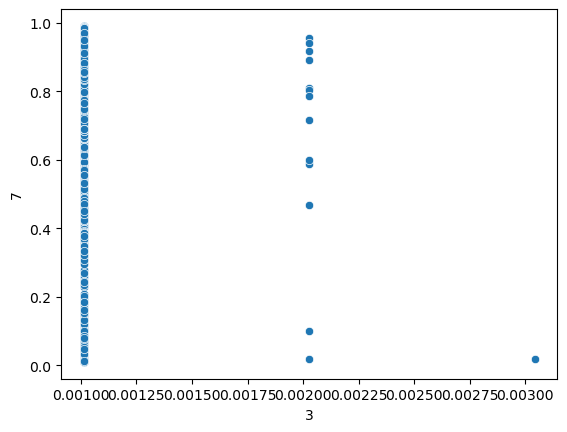

In [29]:
sns.scatterplot(x=mut_methBC[3], y=mut_methBC[7])

In [30]:
#larger window size
mut1k_methBC = pd.read_table('mut1kwindow_methBC.bed', header=None)
mut1k_methBC.shape

(182259, 8)

In [43]:
mut1k_methBC[mut1k_methBC[3]>0.01]

,0,1,2,3,4,5,6,7
5192,chr10,8069470,8069471,0.021298,chr10,8069768,8069769,0.544709
5210,chr10,8069550,8069551,0.010142,chr10,8069768,8069769,0.544709
30550,chr14,104780214,104780214,0.025355,chr14,104780992,104780993,0.984784
30551,chr14,104780214,104780214,0.025355,chr14,104780195,104780196,0.972377
30552,chr14,104780214,104780214,0.025355,chr14,104780224,104780225,0.987481
30553,chr14,104780214,104780214,0.025355,chr14,104780712,104780713,0.895272
30554,chr14,104780214,104780214,0.025355,chr14,104780833,104780834,0.982505
30555,chr14,104780214,104780214,0.025355,chr14,104780371,104780372,0.862638
57316,chr17,7673802,7673802,0.016227,chr17,7673772,7673773,0.944724
57473,chr17,7675088,7675088,0.019270,chr17,7675729,7675730,0.803683


In [42]:
#larger window size
mut10k_methBC = pd.read_table('mut10kwindow_methBC.bed', header=None)
mut10k_methBC.shape

(1003294, 8)

In [ ]:
meth_data[meth_data['chrom'].str.contains('*')].head